In [ ]:
from google.colab import drive
drive.mount('/content/drive')

100%|██████████| 4000/4000 [00:21<00:00, 187.23it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


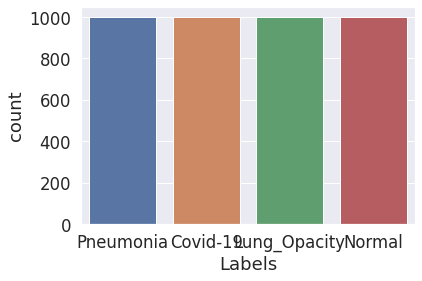

Covid-19: 1000
Normal: 1000
Pneumonia:  1000
Lung_Opacity:  1000


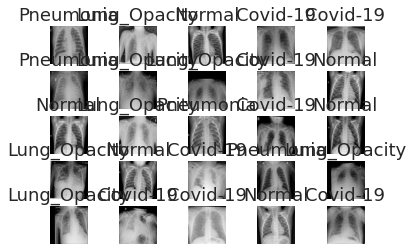

['Covid-19' 'Lung_Opacity' 'Normal' 'Pneumonia']
[0. 0. 0. 1.]
(3200, 150, 150, 3)
(800, 150, 150, 3)
(3200, 4)
(800, 4)
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 150, 150, 24) 648         input_2[0][0]                    
__________________________________________________________________________________________________
activation_16 (Activation)      (None, 150, 150, 24) 0           conv2d_15[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 75, 75, 24)   0           activ

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Test Loss is 0.6569744944572449
Test Accuracy is 0.25
Viral Pneumonia
Train classification report on train data section


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Covid-19    0.00000   0.00000   0.00000       800
Lung_Opacity    0.00000   0.00000   0.00000       800
      Normal    0.25000   1.00000   0.40000       800
   Pneumonia    0.00000   0.00000   0.00000       800

    accuracy                        0.25000      3200
   macro avg    0.06250   0.25000   0.10000      3200
weighted avg    0.06250   0.25000   0.10000      3200

Test classification report on test data section
              precision    recall  f1-score   support

    Covid-19    0.00000   0.00000   0.00000       200
Lung_Opacity    0.00000   0.00000   0.00000       200
      Normal    0.25000   1.00000   0.40000       200
   Pneumonia    0.00000   0.00000   0.00000       200

    accuracy                        0.25000       800
   macro avg    0.06250   0.25000   0.10000       800
weighted avg    0.06250   0.25000   0.10000       800



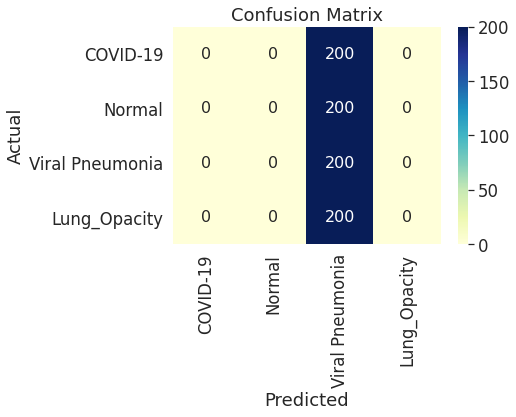

##### Plot the training loss and accuracy #####


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
80/80 [==============================] - 481s 6s/step - loss: 0.5630 - acc: 0.4497 - val_loss: 0.6962 - val_acc: 0.2488
Epoch 2/10
80/80 [==============================] - 469s 6s/step - loss: 0.4395 - acc: 0.6097 - val_loss: 0.6294 - val_acc: 0.3288
Epoch 3/10
80/80 [==============================] - 469s 6s/step - loss: 0.3954 - acc: 0.6803 - val_loss: 0.6085 - val_acc: 0.3162
Epoch 4/10
80/80 [==============================] - 470s 6s/step - loss: 0.3692 - acc: 0.7169 - val_loss: 0.5738 - val_acc: 0.2988
Epoch 5/10
80/80 [==============================] - 469s 6s/step - loss: 0.3452 - acc: 0.7447 - val_loss: 0.4805 - val_acc: 0.4950
Epoch 6/10
80/80 [==============================] - 470s 6s/step - loss: 0.3298 - acc: 0.7569 - val_loss: 0.4643 - val_acc: 0.5113
Epoch 7/10
80/80 [==============================] - 472s 6s/step - loss: 0.3119 - acc: 0.7741 - val_loss: 0.5347 - val_acc: 0.4525
Epoch 8/10
80/80 [==============================] - 467s 6s/step - loss: 0.2995 - a

<Figure size 432x288 with 0 Axes>

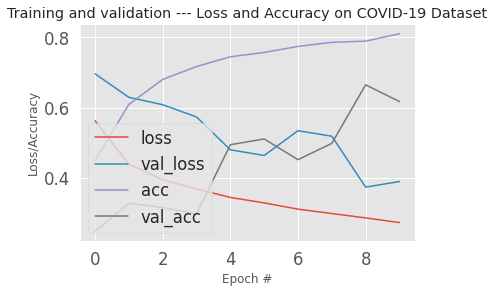

<Figure size 432x288 with 0 Axes>

In [2]:
# DENSE NET CODE
# code: https://www.kaggle.com/sohaibanwaar1203/dense-net-image-classification

#Code : help:https://colab.research.google.com/github/google/eng-edu/blob/master/ml/pc/exercises/image_classification_part3.ipynb#scrollTo=Cj4rXshqbQlS
"""classification-of-covid-19-using-cnn.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1Rh1PQmp3fvMAuhML_k2HUQ2qq21nSg-E
"""

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: 
# https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) 
# will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames
          #print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) 
# that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, 
# but they won't be saved outside of the current session
"""# import Libraries"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
import cv2, os, gc, glob
from tqdm import tqdm

from tensorflow.keras import layers, models

import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder



#      DATA PREPARATION   ######
"""# ****Explorer****"""
'''
os.listdir('/kaggle/input')

os.listdir('/kaggle/input/covid19-radiography-database')

os.listdir('/kaggle/input/covid19-radiography-database/COVID-19 Radiography Database')
'''
#os.listdir('D:/Image Procesing code model data/Covid19 Analysis model/CNN/COVID-19_Radiography_Dataset')
os.listdir('/content/drive/MyDrive/DATA/IMAGE/COVID-19_Radiography_Dataset')
#D:/DOWNLOAD/Covid19 Analysis model/CNN/COVID-19_Radiography_Dataset
# Image paths

imagePaths = []
#for dirname, _, filenames in os.walk('/kaggle/input'):
#for dirname, _, filenames in os.walk('D:/Image Procesing code model data/Covid19 Analysis model/CNN/COVID-19_Radiography_Dataset'):
#for dirname, _, filenames in os.walk('D:/Image Procesing code model data/Covid19 Analysis model/CNN/COVID-19_Radiography_Dataset'): 
for dirname, _, filenames in os.walk('/content/drive/MyDrive/DATA/IMAGE/COVID-19_Radiography_Dataset'):   
    for filename in filenames:
        if (filename[-3:] == 'png'):
            imagePaths.append(os.path.join(dirname, filename))

# Data - Label

Data = []
Target = []
resize = 150
#cat = {'Viral Pneumonia': 'Pneumonia', 'NORMAL': 'Normal', 'COVID-19': 'Covid-19'}
cat = {'Viral Pneumonia': 'Pneumonia', 'Normal': 'Normal', 'COVID': 'Covid-19', 'Lung_Opacity': 'Lung_Opacity'}

for imagePath in tqdm(imagePaths):
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (resize, resize)) /255

    Data.append(image)
    Target.append(cat[label])

# Count by Label

df = pd.DataFrame(Target,columns=['Labels'])
sns.countplot(df['Labels'])
#plt.figure(figsize=(20,20))
plt.show()
plt.savefig("ClassLevelplot.png")

print('Covid-19:',Target.count('Covid-19'))
print('Normal:',Target.count('Normal'))
print('Pneumonia: ',Target.count('Pneumonia'))
print('Lung_Opacity: ',Target.count('Lung_Opacity'))


# Images shape

size = []
for file in imagePaths: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

# Show Images

#plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(imagePaths),25))) : 
    plt.subplot(5,5,n+1)
    plt.imshow(Data[i] , cmap='gray')
    plt.title(Target[i])
    plt.axis('off')     
plt.show()
plt.savefig("ImageCategoryplot.png")

"""# Prepare Data"""

# encode labels as integers

le = LabelEncoder()
labels = le.fit_transform(Target)
labels = to_categorical(labels)

print(le.classes_)
print(labels[0])

# split Data

(x_train, x_test, y_train, y_test) = train_test_split(Data, labels,test_size=0.20,
                                                      stratify=labels,random_state=42)

trainX = np.array(x_train)
testX = np.array(x_test)
trainY = np.array(y_train)
testY = np.array(y_test)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

trainX[0]


# DenseNet model
import keras
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Input, Activation, Dropout, GlobalAveragePooling2D, \
    BatchNormalization, concatenate, AveragePooling2D
from keras.optimizers import Adam



def conv_layer(conv_x, filters):
    conv_x = BatchNormalization()(conv_x)
    conv_x = Activation('relu')(conv_x)
    conv_x = Conv2D(filters, (3, 3), kernel_initializer='he_uniform', padding='same', use_bias=False)(conv_x)
    conv_x = Dropout(0.2)(conv_x)

    return conv_x


def dense_block(block_x, filters, growth_rate, layers_in_block):
    for i in range(layers_in_block):
        each_layer = conv_layer(block_x, growth_rate)
        block_x = concatenate([block_x, each_layer], axis=-1)
        filters += growth_rate

    return block_x, filters


def transition_block(trans_x, tran_filters):
    trans_x = BatchNormalization()(trans_x)
    trans_x = Activation('relu')(trans_x)
    trans_x = Conv2D(tran_filters, (1, 1), kernel_initializer='he_uniform', padding='same', use_bias=False)(trans_x)
    trans_x = AveragePooling2D((2, 2), strides=(2, 2))(trans_x)

    return trans_x, tran_filters


def dense_net(filters, growth_rate, classes, dense_block_size, layers_in_block):
    #input_img = Input(shape=(32, 32, 3))
    input_img = Input(shape=(150, 150, 3))
    x = Conv2D(24, (3, 3), kernel_initializer='he_uniform', padding='same', use_bias=False)(input_img)

    dense_x = BatchNormalization()(x)
    dense_x = Activation('relu')(x)

    dense_x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(dense_x)
    for block in range(dense_block_size - 1):
        dense_x, filters = dense_block(dense_x, filters, growth_rate, layers_in_block)
        dense_x, filters = transition_block(dense_x, filters)

    dense_x, filters = dense_block(dense_x, filters, growth_rate, layers_in_block)
    dense_x = BatchNormalization()(dense_x)
    dense_x = Activation('relu')(dense_x)
    dense_x = GlobalAveragePooling2D()(dense_x)

    output = Dense(classes, activation='softmax')(dense_x)

    return Model(input_img, output)


dense_block_size = 3
layers_in_block = 4

growth_rate = 12
classes = 4   ######################################################### Class Number ############
model = dense_net(growth_rate * 2, growth_rate, classes, dense_block_size, layers_in_block)
model.summary()
# training
#batch_size = 32
#epochs = 10
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics=['acc'])


#  RESULT ANALYSIS SECTION

modelLoss, modelAccuracy = model.evaluate(testX, testY, verbose=0)

print('Test Loss is {}'.format(modelLoss))
print('Test Accuracy is {}'.format(modelAccuracy ))

class_names = ['COVID-19','Normal','Viral Pneumonia', 'Lung_Opacity']
cat = {'Viral Pneumonia': 'Pneumonia', 'Normal': 'Normal', 'COVID': 'Covid-19', 'Lung_Opacity': 'Lung_Opacity'}
y_pred = model.predict(testX)
print(class_names[np.argmax(y_pred[1])])

# classification report on train
batch_size=40
epochs=10
print("Train classification report on train data section")
predIdxs = model.predict (trainX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(trainY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))

# classification report on test

print("Test classification report on test data section")
predIdxs = model.predict(testX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))

# Plotting Confusion Matrix
x = confusion_matrix(testY.argmax(axis=1),y_pred.argmax(axis=1))
Confusion_Matrix = pd.DataFrame(x, index=class_names, columns=class_names)

sns.set(font_scale=1.5, color_codes=True, palette='deep')
sns.heatmap(Confusion_Matrix, annot=True, annot_kws={'size':16}, fmt='d', cmap='YlGnBu')

plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title('Confusion Matrix')
plt.show()
plt.savefig("Confusion Matrix plot.png")

#model.save('CNN_Covid19_Xray_V1.h5')


#'''Visualization'''
# plot the training loss and accuracy
print("##### Plot the training loss and accuracy #####")
trainAug = ImageDataGenerator(rotation_range=15, fill_mode="nearest")
H = model.fit_generator(
    trainAug.flow(trainX, trainY, batch_size=batch_size),
    steps_per_epoch=len(trainX) // batch_size,
    validation_data=(testX, testY),
    validation_steps=len(testX) // batch_size,
    epochs=epochs)

#N = EPOCHS
N=epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training and validation --- Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()
plt.savefig("Acc Loss plot.png")









100%|██████████| 4000/4000 [00:28<00:00, 139.49it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


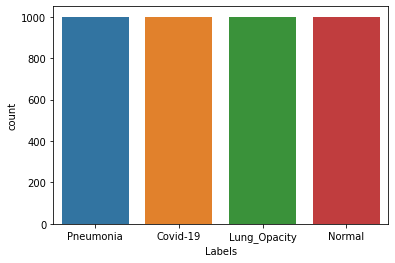

Covid-19: 1000
Normal: 1000
Pneumonia:  1000
Lung_Opacity:  1000


<Figure size 432x288 with 0 Axes>

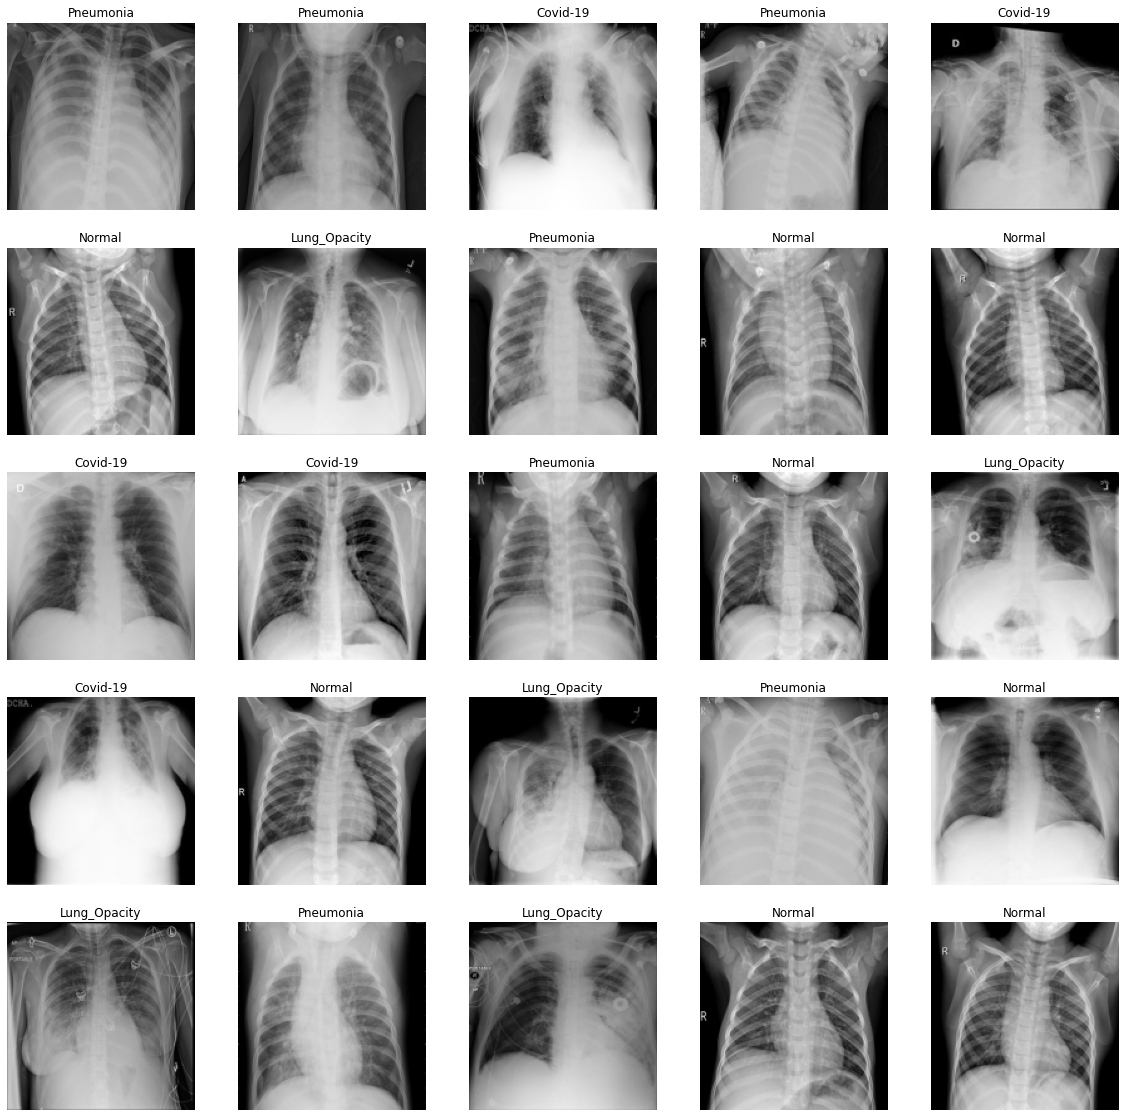

['Covid-19' 'Lung_Opacity' 'Normal' 'Pneumonia']
[0. 0. 0. 1.]
(3200, 150, 150, 3)
(800, 150, 150, 3)
(3200, 4)
(800, 4)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 33, 33, 128)       0         
_

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Covid-19    0.24882   0.99000   0.39769       800
Lung_Opacity    0.00000   0.00000   0.00000       800
      Normal    0.00000   0.00000   0.00000       800
   Pneumonia    0.17647   0.00375   0.00734       800

    accuracy                        0.24844      3200
   macro avg    0.10632   0.24844   0.10126      3200
weighted avg    0.10632   0.24844   0.10126      3200

              precision    recall  f1-score   support

    Covid-19    0.24812   0.99000   0.39679       200
Lung_Opacity    0.00000   0.00000   0.00000       200
      Normal    0.00000   0.00000   0.00000       200
   Pneumonia    0.00000   0.00000   0.00000       200

    accuracy                        0.24750       800
   macro avg    0.06203   0.24750   0.09920       800
weighted avg    0.06203   0.24750   0.09920       800



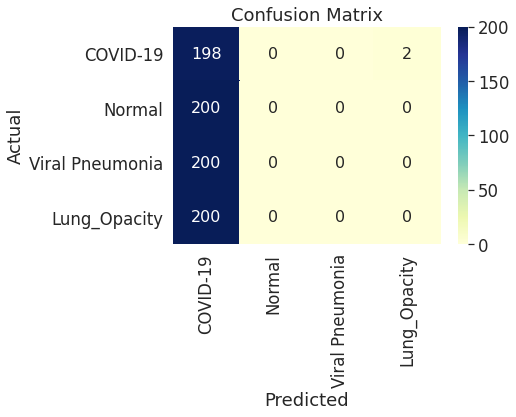

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
80/80 [==============================] - 158s 2s/step - loss: 1.4642 - accuracy: 0.6075 - val_loss: 0.4757 - val_accuracy: 0.8213
Epoch 2/10
80/80 [==============================] - 159s 2s/step - loss: 0.5629 - accuracy: 0.7781 - val_loss: 0.4347 - val_accuracy: 0.8238
Epoch 3/10
80/80 [==============================] - 157s 2s/step - loss: 0.4868 - accuracy: 0.8172 - val_loss: 0.3688 - val_accuracy: 0.8712
Epoch 4/10
80/80 [==============================] - 157s 2s/step - loss: 0.5019 - accuracy: 0.8053 - val_loss: 0.4449 - val_accuracy: 0.8300
Epoch 5/10
80/80 [==============================] - 157s 2s/step - loss: 0.4441 - accuracy: 0.8338 - val_loss: 0.3728 - val_accuracy: 0.8637
Epoch 6/10
80/80 [==============================] - 157s 2s/step - loss: 0.4011 - accuracy: 0.8497 - val_loss: 0.3493 - val_accuracy: 0.8725
Epoch 7/10
80/80 [==============================] - 156s 2s/step - loss: 0.4228 - accuracy: 0.8409 - val_loss: 0.3291 - val_accuracy: 0.8763
Epoch 8/10
80

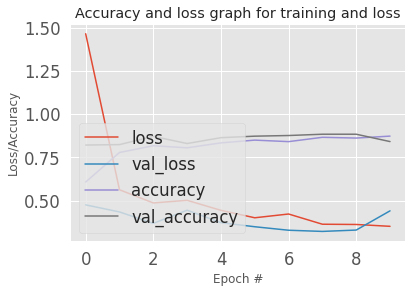

"\nfig, ax = plt.subplots(1, 2, figsize=(22, 8))\nax = ax.ravel()\n\nprint('Ploting graph of Accuracy and loss is here:')\n#for i, met in enumerate(['accuracy', 'loss']):\nfor i, met in enumerate(['acc', 'loss']):\n    ax[i].plot(history.history[met])\n    #ax[i].plot(history.history['val_' + met])\n    ax[i].set_title('Model {}'.format(met))\n    ax[i].set_xlabel('epochs')\n    ax[i].set_ylabel(met)\n    #ax[i].legend(['train', 'val'])\n    ax[i].legend(['train'])\n"